In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# DATA SPLITTING

In [25]:
dataset_split = pd.read_csv("DailyDelhiClimateTest.csv")
dataset_split.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [26]:
dataset_split.shape

(114, 5)

## Bagi ke dua variabel x dan y

In [27]:
x = dataset_split.iloc[:,:-1]
y = dataset_split.iloc[:,-1]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
print("Dimensi x_train: ",x_train.shape)
print("Dimensi x_test: ",x_test.shape)
print("Dimensi y_train: ",y_train.shape)
print("Dimensi y_test: ",y_test.shape)

Dimensi x_train:  (91, 4)
Dimensi x_test:  (23, 4)
Dimensi y_train:  (91,)
Dimensi y_test:  (23,)


## Data Transforming
## Normalisasi

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min_max_scaler = MinMaxScaler()

In [32]:
x_norm = min_max_scaler.fit_transform(
    dataset_split[['meantemp','humidity','wind_speed','meanpressure']]
)

In [33]:
data_normal = pd.DataFrame(x_norm)
data_normal.head()

,0,1,2,3
0,0.209066,0.872396,0.075640,0.000000
1,0.319149,0.761651,0.084061,0.995298
2,0.260047,0.821416,0.146661,0.995356
3,0.327660,0.669797,0.176133,0.992624
4,0.314421,0.732480,0.106684,0.991206


## Standarisasi

In [62]:
print("Nilai standar deviasi sebelum di standarisasi:\n",np.std(dataset_split))

Nilai standar deviasi sebelum di standarisasi:
 meantemp         6.332115
humidity        18.984267
wind_speed       3.572278
meanpressure    89.081395
dtype: float64


In [59]:
from sklearn.preprocessing import StandardScaler

In [40]:
standard_scaler = StandardScaler()

In [41]:
x_standar = standard_scaler.fit_transform(
    dataset_split[['meantemp','humidity','wind_speed','meanpressure']]
)
print("Nilai Sesudah Standarisasi")
np.std(x_standar)

Nilai Sesudah Standarisasi


1.0

In [54]:
data_standarization = pd.DataFrame(x_standar)
data_standarization.head()

,0,1,2,3
0,-0.915971,1.559776,-1.511765,-10.608670
1,-0.507426,1.104275,-1.469505,0.159884
2,-0.726766,1.350093,-1.155357,0.160508
3,-0.475841,0.726477,-1.007459,0.130947
4,-0.524973,0.984293,-1.355976,0.115605


In [43]:
np.mean(x_standar)

2.1425356615573195e-17

In [44]:
import matplotlib.pyplot as plt

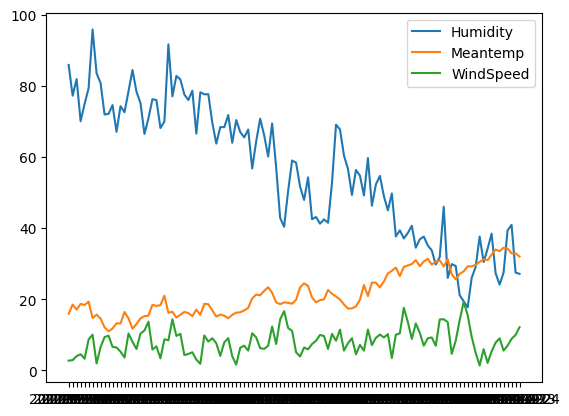

In [51]:
plt.plot(dataset_split.date,dataset_split.humidity,label="Humidity")
plt.plot(dataset_split.date,dataset_split.meantemp,label="Meantemp")
plt.plot(dataset_split.date,dataset_split.wind_speed,label="WindSpeed")
plt.legend()

## Data Normalisasi

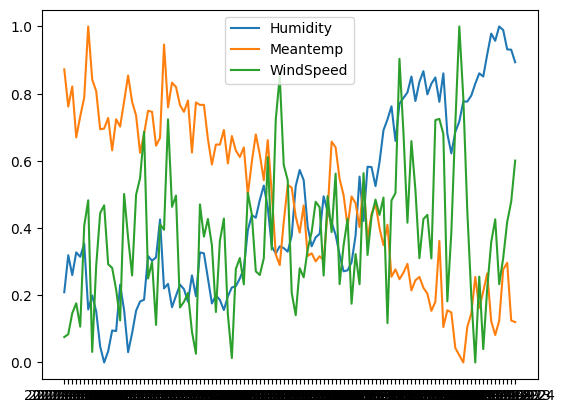

In [52]:
plt.plot(dataset_split.date,data_normal[0],label="Humidity")
plt.plot(dataset_split.date,data_normal[1],label="Meantemp")
plt.plot(dataset_split.date,data_normal[2],label="WindSpeed")
plt.legend()

## Data Standarisasi

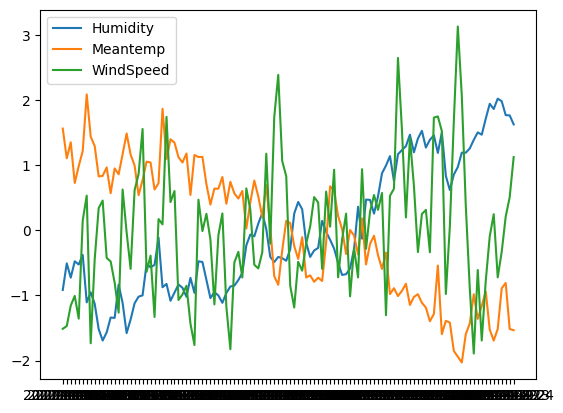

In [57]:
plt.plot(dataset_split.date,data_standarization[0],label="Humidity")
plt.plot(dataset_split.date,data_standarization[1],label="Meantemp")
plt.plot(dataset_split.date,data_standarization[2],label="WindSpeed")
plt.legend()

# Data Cleaning

In [65]:
df = pd.read_csv("DailyDelhiClimateTestRusak.csv")
df[13:20]

,date,meantemp,humidity,wind_speed,meanpressure
13,2017-01-14,13.200000,NaN,NaN,NaN
14,2017-01-15,16.434783,NaN,NaN,NaN
15,2017-01-16,14.650000,NaN,NaN,NaN
16,2017-01-17,11.722222,NaN,NaN,NaN
17,2017-01-18,13.041667,NaN,NaN,NaN
18,2017-01-19,14.619048,75.142857,10.338095,1022.809524
19,2017-01-20,15.263158,66.473684,11.226316,1021.789474


## Menangani nilai NULL

In [66]:
df.isna().sum()

date             0
meantemp         9
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

### Subtitusi nilai NULL (SimpleImputer sklearn)

In [67]:
from sklearn.impute import SimpleImputer

In [68]:
imputer = SimpleImputer(strategy="mean")

In [69]:
df['meantemp']=imputer.fit_transform(df[['meantemp']])
df.isna().sum()

date             0
meantemp         0
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [70]:
df[df.isnull().any(axis=1)]

,date,meantemp,humidity,wind_speed,meanpressure
11,2017-01-12,11.789474,NaN,NaN,NaN
12,2017-01-13,13.235294,NaN,NaN,NaN
13,2017-01-14,13.200000,NaN,NaN,NaN
14,2017-01-15,16.434783,NaN,NaN,NaN
15,2017-01-16,14.650000,NaN,NaN,NaN
16,2017-01-17,11.722222,NaN,NaN,NaN
17,2017-01-18,13.041667,NaN,NaN,NaN
91,2017-04-02,21.001775,NaN,NaN,1004.250000
92,2017-04-03,21.001775,NaN,NaN,1004.250000
93,2017-04-04,21.001775,NaN,NaN,1007.200000


### Subtitusi nilai NULL (Pandas)

In [72]:
df['humidity']=df['humidity'].fillna(df['humidity'].mean())

In [73]:
df.isna().sum()

date             0
meantemp         0
humidity         0
wind_speed      16
meanpressure     7
dtype: int64

### Menangani nilai Duplikat

In [74]:
df[df.duplicated()]

,date,meantemp,humidity,wind_speed,meanpressure
108,2017-04-13,29.666667,29.111111,4.944444,1006.777778
109,2017-04-14,30.500000,37.625000,1.387500,1004.625000
110,2017-04-15,31.222222,30.444444,5.966667,1002.444444


In [75]:
df.drop_duplicates(inplace=True)

In [76]:
df[df.duplicated()]

,date,meantemp,humidity,wind_speed,meanpressure


In [77]:
df.duplicated().sum()

0

# Data Encoding
## Ordinal

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [80]:
nama = ['Maezar','Naufal','Ardi','Diki','Rafi','Heidar','Hadie','Syaban']
hobi = ['Futsal','Game','Game','Rokok','Rokok','Rokok','Futsal','Game']
df = pd.DataFrame({"nama":nama,"hobi":hobi})
df.head(8)

,nama,hobi
0,Maezar,Futsal
1,Naufal,Game
2,Ardi,Game
3,Diki,Rokok
4,Rafi,Rokok
5,Heidar,Rokok
6,Hadie,Futsal
7,Syaban,Game


In [82]:
ordinal_encoder = OrdinalEncoder()

In [84]:
df['hobi_encoded']=ordinal_encoder.fit_transform(df[['hobi']])

In [85]:
df.head(8)

,nama,hobi,hobi_encoded
0,Maezar,Futsal,0.0
1,Naufal,Game,1.0
2,Ardi,Game,1.0
3,Diki,Rokok,2.0
4,Rafi,Rokok,2.0
5,Heidar,Rokok,2.0
6,Hadie,Futsal,0.0
7,Syaban,Game,1.0


## One-hot Encoding

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
onehot_encode = OneHotEncoder(sparse=False)

In [90]:
onehot = onehot_encode.fit_transform(df[['hobi']])

In [92]:
df_onehot= pd.DataFrame(onehot)
df_onehot.head()

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [93]:
df= df.join(df_onehot)
df.head(8)

,nama,hobi,hobi_encoded,0,1,2
0,Maezar,Futsal,0.0,1.0,0.0,0.0
1,Naufal,Game,1.0,0.0,1.0,0.0
2,Ardi,Game,1.0,0.0,1.0,0.0
3,Diki,Rokok,2.0,0.0,0.0,1.0
4,Rafi,Rokok,2.0,0.0,0.0,1.0
5,Heidar,Rokok,2.0,0.0,0.0,1.0
6,Hadie,Futsal,0.0,1.0,0.0,0.0
7,Syaban,Game,1.0,0.0,1.0,0.0
